In [1]:
pip install pandas matplotlib seaborn scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd

# Load the data
data = pd.read_csv('basketball.csv')

# Display the first few rows of the dataframe
data.head()


,b1_s1,b1_s2,b2_s1,b2_s2,b3_s1,b3_s2,b4_s1,b4_s2,b5_s1,b5_s2,b6_s1,b6_s2
0,9.18,3.23,8.05,4.80,4.43,9.38,7.17,5.67,4.78,7.56,7.08,5.45
1,9.60,3.45,8.55,4.69,5.82,8.95,8.07,5.63,5.86,7.13,7.67,5.14
2,10.03,3.83,9.04,4.60,7.01,8.60,8.99,5.64,6.97,6.87,8.26,4.87
3,10.50,4.25,9.51,4.55,8.06,8.26,9.78,5.67,8.01,6.66,8.79,4.66
4,10.90,4.63,9.97,4.46,8.97,7.87,10.49,5.65,8.89,6.48,9.34,4.42


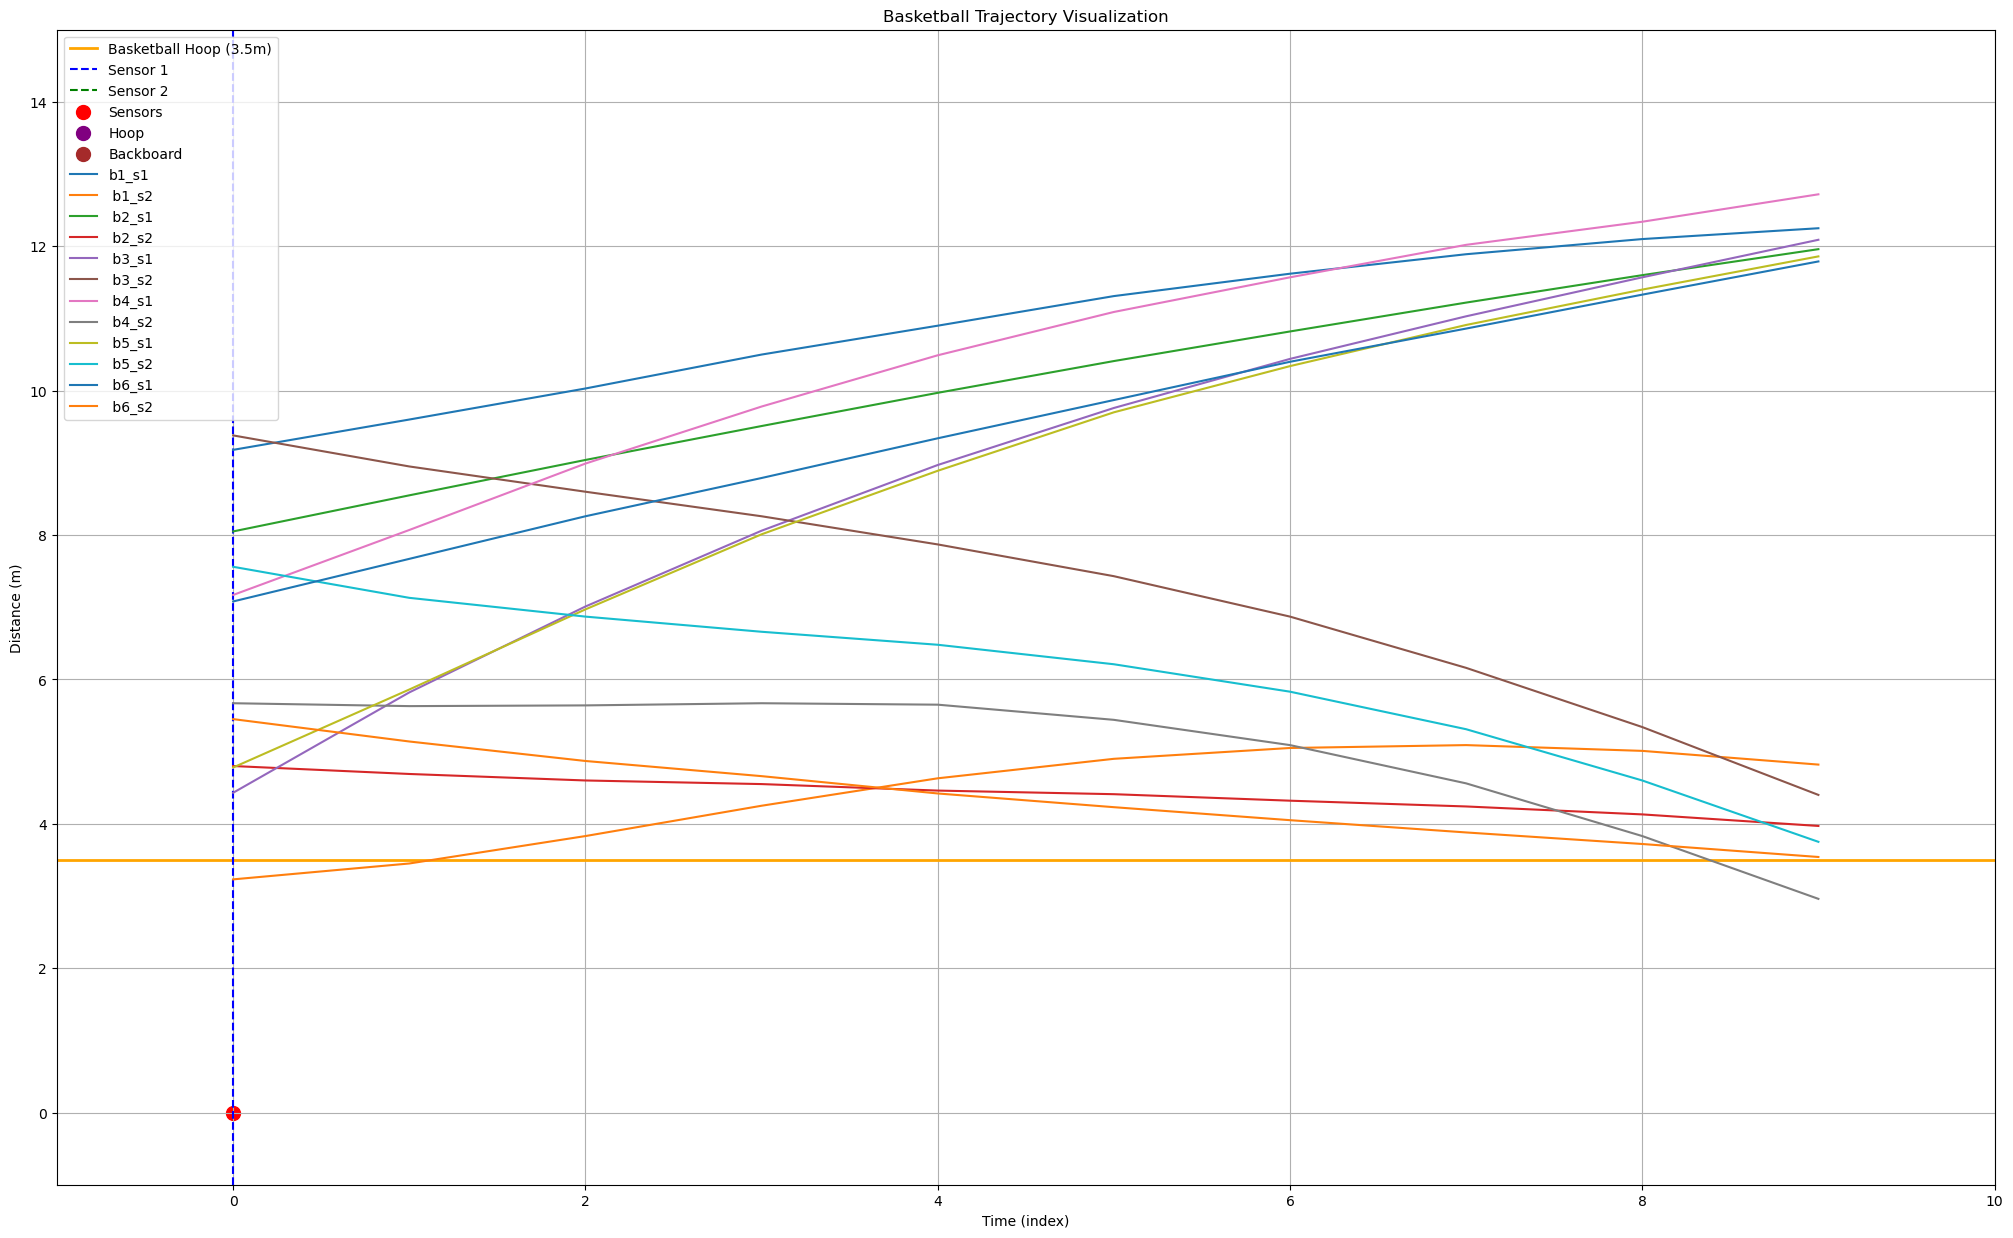

In [6]:
import matplotlib.pyplot as plt
import pandas as pd

# Load your data
data = pd.read_csv('basketball.csv')

# Define court dimensions
sensor1_x = 0
sensor2_x = 12.4
sensor_y = 0
hoop_x = 12.4 + 0.1016  # backboard is 10.16cm or 0.1016m behind the hoop
hoop_y = 3.5
backboard_y = 1.1

# Plotting
plt.figure(figsize=(25, 15))
plt.axhline(hoop_y, color='orange', linewidth=2, label='Basketball Hoop (3.5m)')
plt.axvline(sensor1_x, color='blue', linestyle='--', label='Sensor 1')
plt.axvline(sensor2_x, color='green', linestyle='--', label='Sensor 2')
plt.scatter([sensor1_x, sensor2_x], [sensor_y, sensor_y], color='red', s=100, label='Sensors')
plt.scatter(hoop_x, hoop_y, color='purple', s=100, label='Hoop')
plt.scatter(hoop_x, backboard_y, color='brown', s=100, label='Backboard')

# Add data points for each ball
for column in data.columns:
    # Use time index for x-coordinates
    time_points = data.index  # Assuming the index represents time
    plt.plot(time_points, data[column], label=column)

# Customizing the plot
plt.title('Basketball Trajectory Visualization')
plt.xlabel('Time (index)')
plt.ylabel('Distance (m)')
plt.legend()
plt.xlim(-1, len(data))
plt.ylim(-1, 15)  # Adjust based on expected maximum distance
plt.grid()
plt.show()


In [7]:
# Define hoop position
hoop_position = (hoop_x, hoop_y)

# Calculate distances from the last measurements to the hoop
distances_to_hoop = {}
for column in data.columns:
    last_measurement = data[column].iloc[-1]
    distances_to_hoop[column] = last_measurement - hoop_y  # vertical distance to the hoop

# Convert distances to a DataFrame
distances_df = pd.DataFrame.from_dict(distances_to_hoop, orient='index', columns=['Distance to Hoop'])
distances_df['In Hoop'] = distances_df['Distance to Hoop'] <= 0  # True if the ball is in the hoop

print(distances_df)


        Distance to Hoop  In Hoop
b1_s1               8.75    False
 b1_s2              1.32    False
 b2_s1              8.46    False
 b2_s2              0.47    False
 b3_s1              8.59    False
 b3_s2              0.90    False
 b4_s1              9.22    False
 b4_s2             -0.54     True
 b5_s1              8.36    False
 b5_s2              0.25    False
 b6_s1              8.29    False
 b6_s2              0.04    False


In [8]:
# Predict if the shots will go in based on distance
def predict_shots(df):
    predictions = []
    for index, row in df.iterrows():
        if row['Distance to Hoop'] <= 0:
            predictions.append("In")
        else:
            predictions.append("Out")
    return predictions

distances_df['Prediction'] = predict_shots(distances_df)
print(distances_df)


        Distance to Hoop  In Hoop Prediction
b1_s1               8.75    False        Out
 b1_s2              1.32    False        Out
 b2_s1              8.46    False        Out
 b2_s2              0.47    False        Out
 b3_s1              8.59    False        Out
 b3_s2              0.90    False        Out
 b4_s1              9.22    False        Out
 b4_s2             -0.54     True         In
 b5_s1              8.36    False        Out
 b5_s2              0.25    False        Out
 b6_s1              8.29    False        Out
 b6_s2              0.04    False        Out
